## Exploratory Data Analysis

In [228]:
# my imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

Our initial data review showed that N/A (NaN) values in the dataset are presented by '?'. We need to replace this in the data set.

In [177]:
diabetes_data = pd.read_csv('data/diabetic_data.csv', na_values='?')

C:\Users\Owner\AppData\Local\Temp\ipykernel_8860\484686406.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_data = pd.read_csv('data/diabetic_data.csv', na_values='?')


Ensure all columns are displayed every time:

In [ ]:
diabetes_data.set_option('display.max_columns', None)

Reset to default:

In [ ]:
diabetes_data.reset_option('display.max_columns')

In [178]:
diabetes_data.head(2)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30


In [179]:
diabetes_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [180]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [181]:
diabetes_data.describe(include='all')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,1.017660e+05,1.017660e+05,99493,101766,101766,3197,101766.000000,101766.000000,101766.000000,101766.000000,61510,51817,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101745,101408,100343,101766.000000,5346,17018,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,NaN,NaN,5,3,10,9,NaN,NaN,NaN,NaN,17,72,NaN,NaN,NaN,NaN,NaN,NaN,716,748,789,NaN,3,3,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,NaN,NaN,Caucasian,Female,[70-80),[75-100),NaN,NaN,NaN,NaN,MC,InternalMedicine,NaN,NaN,NaN,NaN,NaN,NaN,428,276,250,NaN,Norm,>8,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,NaN,NaN,76099,54708,26068,1336,NaN,NaN,NaN,NaN,32439,14635,NaN,NaN,NaN,NaN,NaN,NaN,6862,6752,11555,NaN,2597,8216,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864
mean,1.652016e+08,5.433040e+07,NaN,NaN,NaN,NaN,2.024006,3.715642,5.754437,4.395987,NaN,NaN,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,NaN,NaN,NaN,7.422607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.026403e+08,3.869636e+07,NaN,NaN,NaN,NaN,1.445403,5.280166,4.064081,2.985108,NaN,NaN,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,NaN,NaN,NaN,1.933600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.252200e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.496119e+07,2.341322e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,2.000000,NaN,NaN,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.523890e+08,4.550514e+07,NaN,NaN,NaN,NaN,1.000000,1.000000,7.000000,4.000000,NaN,NaN,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.302709e+08,8.754595e+07,NaN,NaN,NaN,NaN,3.000000,4.000000,7.000000,6.000000,NaN,NaN,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
diabetes_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

Multiple identification columns are read as integer, and polute the describe(). First step is to change the data type to 'category'

In [183]:
diabetes_data.encounter_id = diabetes_data.encounter_id.astype('category')
diabetes_data.patient_nbr = diabetes_data.patient_nbr.astype('category')
diabetes_data.admission_type_id = diabetes_data.admission_type_id.astype('category')
diabetes_data.discharge_disposition_id = diabetes_data.discharge_disposition_id.astype('category')
diabetes_data.admission_source_id = diabetes_data.admission_source_id.astype('category')

Now we can see the 'five number summary' for all numerical values:

In [184]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0
number_diagnoses,101766.0,7.422607,1.933600,1.0,6.0,8.0,9.0,16.0


In [185]:
diabetes_data.shape

(101766, 50)

Let's check first the 'target' variable, in our case the column 'readmitted'

In [186]:
diabetes_data.readmitted.value_counts(dropna=False)

readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Let's see the percentage split as well:

In [187]:
diabetes_data.readmitted.value_counts(normalize=True) * 100

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

Now lets explore a few other categorical variables:

In [188]:
diabetes_data.race.value_counts(dropna=False)

race
Caucasian          76099
AfricanAmerican    19210
NaN                 2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64

In [189]:
diabetes_data.gender.value_counts(dropna=False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64

In [190]:
diabetes_data.age.value_counts(dropna=False)

age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64

Looks like the age range between 50 and 100. Let's observe:

In [191]:
len(diabetes_data[
    (diabetes_data.age == '[50-60)') |
    (diabetes_data.age == '[60-70)') |
    (diabetes_data.age == '[70-80)') |
    (diabetes_data.age == '[80-90)') |
    (diabetes_data.age == '[90-100)')
    ]) / len(diabetes_data) * 100

84.30811862508106

In [192]:
diabetes_data.discharge_disposition_id.value_counts(dropna=False)

discharge_disposition_id
1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: count, dtype: int64

We notice that there is a high cardinality in the 'discharge_disposition_id' as we have many unique values but high number is focused on 2-3 values.

In [193]:
diabetes_data.metformin.value_counts(dropna=False)

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

Let's check how many records on average does one patient have:

In [194]:
diabetes_data.patient_nbr.nunique() / len(diabetes_data)

0.7027690977340173

In [195]:
diabetes_data.patient_nbr.value_counts()

patient_nbr
88785891     40
43140906     28
1660293      23
23199021     23
88227540     23
             ..
34935156      1
34935795      1
34935804      1
34937658      1
189502619     1
Name: count, Length: 71518, dtype: int64

We see there is one patient with 40 visits, let's explore:

In [196]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values('encounter_id')

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
38307,119039172,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,OG,Emergency/Trauma,32,0,10,0,0,0,250.13,244,490,3,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
40252,125094312,88785891,Caucasian,Female,[20-30),NaN,1,1,7,1,BC,Emergency/Trauma,10,0,10,1,0,2,250.11,244,NaN,2,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30
40661,126171582,88785891,Caucasian,Female,[20-30),NaN,1,1,7,5,BC,Emergency/Trauma,35,0,15,1,0,3,250.13,536,V58,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
44515,137245596,88785891,Caucasian,Female,[20-30),NaN,3,1,7,2,SP,Surgery-General,1,0,8,1,0,5,250.11,465,244,3,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
45147,139425576,88785891,Caucasian,Female,[20-30),NaN,1,1,7,2,BC,Emergency/Trauma,32,0,4,1,0,6,250.11,V58,V15,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
45986,141994242,88785891,Caucasian,Female,[20-30),NaN,2,1,7,4,BC,Emergency/Trauma,8,0,14,1,0,7,250.1,276,276,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50167,150986298,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,BC,Emergency/Trauma,2,0,9,4,1,9,8,250.01,V09,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50393,151413846,88785891,Caucasian,Female,[20-30),NaN,1,1,7,4,SP,Emergency/Trauma,64,0,19,4,1,9,250.11,305,V58,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
50773,152188656,88785891,Caucasian,Female,[20-30),NaN,2,7,7,1,BC,Surgery-General,33,0,10,4,1,10,250.11,244,V15,6,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30
51519,153558456,88785891,Caucasian,Female,[20-30),NaN,2,1,7,1,BC,Emergency/Trauma,35,0,10,3,1,11,250.11,V15,V58,4,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,<30


In [197]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values('encounter_id').insulin

38307       Up
40252     Down
40661       Up
44515       Up
45147       Up
45986       Up
50167       Up
50393       Up
50773       Up
51519       Up
52057       Up
53771     Down
54497     Down
60263       Up
62759       Up
63165     Down
65667       Up
67968     Down
71029       Up
72068     Down
74405       Up
74876     Down
75267     Down
76525       Up
76907     Down
78355       Up
78882       Up
79202       Up
79467       Up
82693     Down
87063     Down
87854       Up
88392       Up
89964     Down
90913       Up
91444       Up
97433     Down
97732       Up
99950       Up
101385      No
Name: insulin, dtype: object

In [198]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values('encounter_id').readmitted.value_counts()

readmitted
<30    23
>30    17
Name: count, dtype: int64

In [199]:
diabetes_data[diabetes_data.patient_nbr == 88785891].sort_values('encounter_id').readmitted.value_counts(normalize=True) * 100

readmitted
<30    57.5
>30    42.5
Name: proportion, dtype: float64

This patient was readmetted 57.5% of the times less than 30 days after discharge 

Let's start the preparation for our modeling phase, first we extract X and y (dependable variable or 'target' and independable variables or 'attributes')

In [200]:
attributes = diabetes_data.drop(columns = 'readmitted')

In [265]:
target = diabetes_data.readmitted

In [201]:
attributes.shape

(101766, 49)

We drop the columns 'encounter_id', 'patient_nbr' as they have very low entropy and don't bring useful information for the model.

In [202]:
attributes = attributes.drop(columns = ['encounter_id', 'patient_nbr'])

Let's explore diag_1, diag_2 and diag3 columns

In [203]:
attributes.diag_3.isna().sum()

1423

In [204]:
attributes.diag_2.isna().sum()

358

In [205]:
attributes.diag_1.isna().sum()

21

We notice that diag_1 has only 21 missing values and 2 and 3 have significantly more, which is expected, 

In [206]:
attributes.weight.isna().sum() / len(diabetes_data)

0.9685847925633315

Looks like only ~3% of the records have weight. We drop it as well.

In [207]:
attributes = attributes.drop(columns = 'weight')

In [208]:
attributes.shape

(101766, 46)

We do the same for 'payer_code' and 'medical_specialty'

In [209]:
attributes = attributes.drop(columns = ['payer_code','medical_specialty'])

<Axes: >

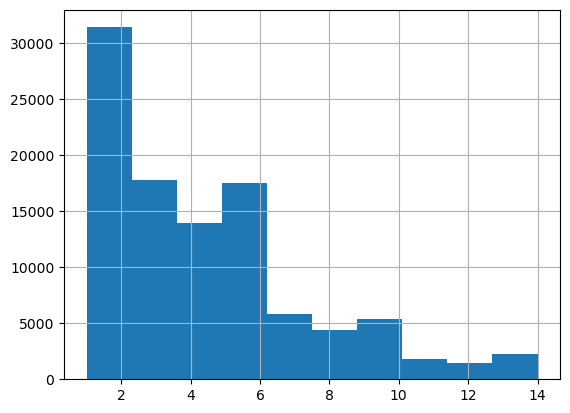

In [210]:
attributes.time_in_hospital.hist()

<Axes: >

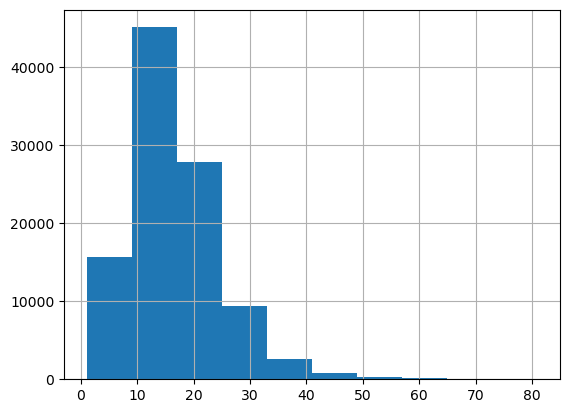

In [211]:
diabetes_data.num_medications.hist()

In [212]:
diabetes_data[diabetes_data.num_medications > 80]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
43877,135412542,24189597,Caucasian,Male,[60-70),NaN,3,22,1,10,MC,Surgery-Cardiovascular/Thoracic,57,3,81,0,0,0,414,411,496,6,NaN,NaN,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,<30


In [213]:
diabetes_data[diabetes_data.num_medications > 80].num_medications

43877    81
Name: num_medications, dtype: int64

Looks like one patient was prescribed 81 medications

Scale the data using Z-score (standard scaling)
$$z = \frac{x - \mu}{\sigma}$$
Where:
x is the original data point, <br>
μ is the mean of the dataset, <br>
σ is the standard deviation of the dataset, <br>
z is the standardized value (Z-score).

<Axes: >

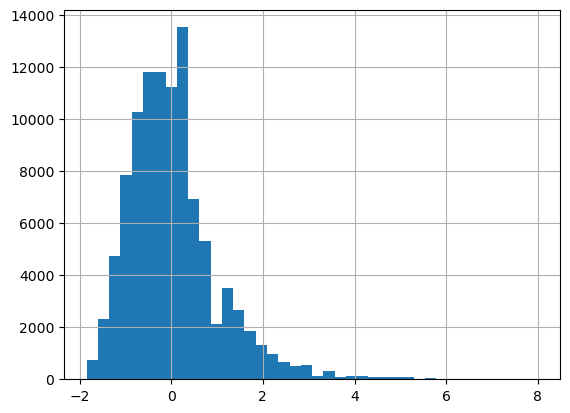

In [214]:
((diabetes_data.num_medications - diabetes_data.num_medications.mean()) / diabetes_data.num_medications.std()).hist(bins=40)

Scale the data using MinMaxScaling:

$$X' = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$$

Where:

X is the original value
Xmin is the minimum value of the feature
𝑋max is the maximum value of the feature
𝑋′ is the scaled value

<Axes: >

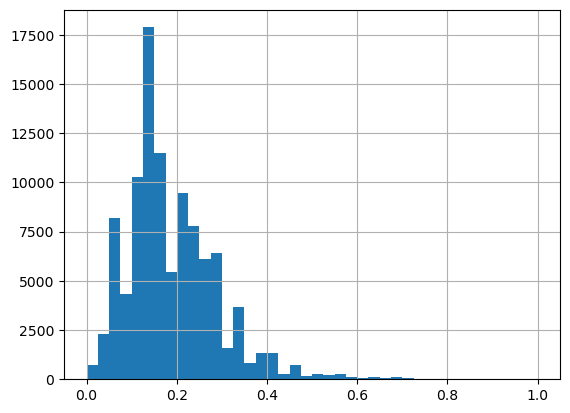

In [215]:
((diabetes_data.num_medications - diabetes_data.num_medications.min()) / (diabetes_data.num_medications.max() - diabetes_data.num_medications.min())).hist(bins = 40)

Dummificatino using pd.get_dummies(). This is called One-hot encoding

In [216]:
pd.get_dummies(diabetes_data.metformin).astype(int).head()

,Down,No,Steady,Up
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


We can also remove one of the columns as it is understood based on the rest.

In [217]:
pd.get_dummies(diabetes_data.metformin, drop_first = True).astype(int).head()

,No,Steady,Up
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


We can use map function to encode this:

In [218]:
attributes.metformin.replace({'No':-99, 'Down':-1, 'Steady': 0, 'Up': 1}).astype(int).head()

0   -99
1   -99
2   -99
3   -99
4   -99
Name: metformin, dtype: int32

Now let's dummify all columns from 'attributes'

In [232]:
attributes.shape

(101766, 44)

In [220]:
attributes.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [238]:
# attributes = pd.get_dummies(attributes, drop_first = True)
attributes = pd.get_dummies(attributes, drop_first = True).astype(int)

In [239]:
attributes.shape

(101766, 2375)

In [240]:
attributes.head()

time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
0                 1                  41               0                1   
1                 3                  59               0               18   
2                 2                  11               5               13   
3                 2                  44               1               16   
4                 1                  51               0                8   

   number_outpatient  number_emergency  number_inpatient  number_diagnoses  \
0                  0                 0                 0                 1   
1                  0                 0                 0                 9   
2                  2                 0                 1                 6   
3                  0                 0                 0                 7   
4                  0                 0                 0                 5   

   race_Asian  race_Caucasian  race_Hispanic  race_Other  gender_Male  \
0           0               1              0           0            0   
1           0               1              0           0            0   
2           0               0              0           0            0   
3           0               1              0           0            1   
4           0               1              0           0            1   

   gender_Unknown/Invalid  age_[10-20)  age_[20-30)  age_[30-40)  age_[40-50)  \
0                       0            0            0            0            0   
1                       0            1            0            0            0   
2                       0            0            1            0            0   
3                       0            0            0            1            0   
4                       0            0            0            0            1   

   age_[50-60)  age_[60-70)  age_[70-80)  age_[80-90)  age_[90-100)  \
0            0            0            0            0             0   
1            0            0            0            0             0   
2            0            0            0            0             0   
3            0            0            0            0             0   
4            0            0            0            0             0   

   admission_type_id_2  admission_type_id_3  admission_type_id_4  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   admission_type_id_5  admission_type_id_6  admission_type_id_7  \
0                    0                    1                    0   
1                    0                    0                    0   
2                    0                    0                    0   
3                    0                    0                    0   
4                    0                    0                    0   

   admission_type_id_8  discharge_disposition_id_2  \
0                    0                           0   
1                    0                           0   
2                    0                           0   
3                    0                           0   
4                    0                           0   

   discharge_disposition_id_3  discharge_disposition_id_4  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   discharge_disposition_id_5  discharge_disposition_id_6  \
0                           0                           0   
1                           0                           0   
2                           0  

In [241]:
scaler = MinMaxScaler()

In [242]:
scaler.fit(attributes)

MinMaxScaler()

In [244]:
scaler.transform(attributes)

array([[0.        , 0.30534351, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.15384615, 0.44274809, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.07692308, 0.07633588, 0.83333333, ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.39694656, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.69230769, 0.33587786, 0.33333333, ..., 0.        , 0.        ,
        1.        ],
       [0.38461538, 0.09160305, 0.5       , ..., 0.        , 1.        ,
        0.        ]])

In [247]:
attributes = scaler.transform(attributes)

In [251]:
attributes.shape

(101766, 2375)

In [252]:
attributes.dtype

dtype('float64')

Scikit-learn comes with OneHotEncoder and LabelEncoder

In [255]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

Let's make our first model using Sci-Kit Learn Logistic Regression

In [257]:
from sklearn.linear_model import LogisticRegression

In [258]:
model = LogisticRegression()

In [269]:
train_attributes = attributes[:10_000]
train_target = target[:10_000]

In [270]:
model.fit(train_attributes, train_target)

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [271]:
model.score(train_attributes, train_target)

0.6371